In [1]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Local -> all other imports in source files
import settings.custom
from prophandler import PropHandler

from visualizations import prop_ratio
from backup_projections import load_backup_projections, create_historical_props
from private import _load_stokastic_data
from __utils import load_injuries, output_msgs

SITE = "draftkings"
MODE = "classic"
# MODE = 'showdown'

# Won't work unless you input path to FanDuel contest file (DK does not have injury columns)
DROP = load_injuries() + []
HISTORICAL = create_historical_props()
BACKUP_EDITS_FILE = '../data/backup_projections.json'
# BACKUP_EDITS_FILE = [
#     '../data/historical/2025-05-14.csv',
#     '../data/historical/2025-05-18.csv'
# ]

# Players who do not currently have props available
# EDITS, OWNERSHIP = load_backup_projections(file=BACKUP_EDITS_FILE), dict()

EDITS, OWNERSHIP = _load_stokastic_data(drop=DROP)

# Prop projections always take precedence unless overriden
OVERRIDE_EDITS = {}

In [2]:
df = PropHandler(
    SITE,
    MODE,
    edits=EDITS,
    ownership=OWNERSHIP,
    drop=DROP,
    # override_edits=OVERRIDE_EDITS
).load(
    update=True,
    sort="e_fpts/$",
).reset_index().assign(
    e_ratio=lambda df_: (df_.e_fpts / df_.fpts).round(3),
    # historical=lambda df_: df_.name.map(lambda name_: HISTORICAL.get(name_, 0.0)),
    # hist_diff=lambda df_: df_.fpts-df_.historical,
    # hist_ratio=lambda df_: (df_.fpts/df_.historical).round(2),
    rank=lambda df_: df_.index+1
).set_index('name')



-------------------------------------
PropHandler.load started at: 03:43:58
-------------------------------------
----------------------------------------
Beginning WebScrape of NBA Player Props.
----------------------------------------
Prop projection only: ['Gary Trent', 'Ace Bailey', 'Daniel Gafford', 'Oso Ighodaro', 'Josh Okogie', 'Svi Mykhailiuk', 'Jusuf Nurkic']
Biggest movers (fpts):


,pos,salary,team,opp,gametime,fpts,e_fpts,props,fpts/$,e_fpts/$,open,e_open,movement,e_movement
name,,,,,,,,,,,,,,
Jaden Hardy,SG,3800.0,DAL,UTA,"(8, 30)",27.85,13.925,---,7.329,3.664,16.97,8.48,10.88,5.44
Kyle Filipowski,PF/C,5900.0,UTA,DAL,"(8, 30)",25.62,12.960,PRAB3(ST),4.342,2.197,32.39,16.20,-6.77,-3.24
Collin Gillespie,PG/SG,6100.0,PHO,DET,"(7, 0)",31.62,15.740,PRASB3(T),5.184,2.580,25.62,12.95,6.00,2.79
Cade Cunningham,PG,10700.0,DET,PHO,"(7, 0)",47.62,24.760,PRASB3T,4.450,2.314,51.62,24.50,-4.00,0.26
Dillon Brooks,SF/PF,6300.0,PHO,DET,"(7, 0)",31.62,14.940,PRASB3T,5.019,2.371,28.62,14.24,3.00,0.70
Grayson Allen,SG/SF,5200.0,PHO,DET,"(7, 0)",27.38,13.450,PRASB3(T),5.265,2.587,24.88,11.49,2.50,1.96
Mark Williams,C,5700.0,PHO,DET,"(7, 0)",25.62,13.020,PRASB(T),4.495,2.284,23.12,11.85,2.50,1.17
Jordan Goodwin,PG/SG,4400.0,PHO,DET,"(7, 0)",20.88,10.950,PRA3(SBT),4.745,2.489,18.84,9.42,2.04,1.53
Naji Marshall,SG/SF,6300.0,DAL,UTA,"(8, 30)",36.62,18.040,PRASB3(T),5.813,2.863,34.62,16.39,2.00,1.65


Biggest movers (e_fpts):


,pos,salary,team,opp,gametime,fpts,e_fpts,props,fpts/$,e_fpts/$,open,e_open,movement,e_movement
name,,,,,,,,,,,,,,
Jaden Hardy,SG,3800.0,DAL,UTA,"(8, 30)",27.85,13.925,---,7.329,3.664,16.97,8.48,10.88,5.44
Kyle Filipowski,PF/C,5900.0,UTA,DAL,"(8, 30)",25.62,12.960,PRAB3(ST),4.342,2.197,32.39,16.20,-6.77,-3.24
Collin Gillespie,PG/SG,6100.0,PHO,DET,"(7, 0)",31.62,15.740,PRASB3(T),5.184,2.580,25.62,12.95,6.00,2.79
Grayson Allen,SG/SF,5200.0,PHO,DET,"(7, 0)",27.38,13.450,PRASB3(T),5.265,2.587,24.88,11.49,2.50,1.96
Naji Marshall,SG/SF,6300.0,DAL,UTA,"(8, 30)",36.62,18.040,PRASB3(T),5.813,2.863,34.62,16.39,2.00,1.65
Jordan Goodwin,PG/SG,4400.0,PHO,DET,"(7, 0)",20.88,10.950,PRA3(SBT),4.745,2.489,18.84,9.42,2.04,1.53
Giannis Antetokounmpo,PF,11000.0,MIL,SA,"(8, 0)",52.88,26.320,PRASB3(T),4.807,2.393,52.88,24.83,0.00,1.49
Kevin Durant,SG/SF,8900.0,HOU,OKC,"(7, 30)",40.62,18.750,PRASB3(T),4.564,2.107,40.62,20.21,0.00,-1.46
Keyonte George,PG,8200.0,UTA,DAL,"(8, 30)",44.38,21.510,PRASB3(T),5.412,2.623,42.38,20.16,2.00,1.35


--------------------
10 teams total
Missing: 0% of teams
--------------------
----------------
79 TOTAL PLAYERS
      num-players
team             
UTA            11
DET             9
SA              8
MIL             8
OKC             8
BOS             7
DAL             7
HOU             7
MIA             7
PHO             7
----------------
----------------------------------------------
Performance time for PropHandler.load: 0m 31s.
----------------------------------------------


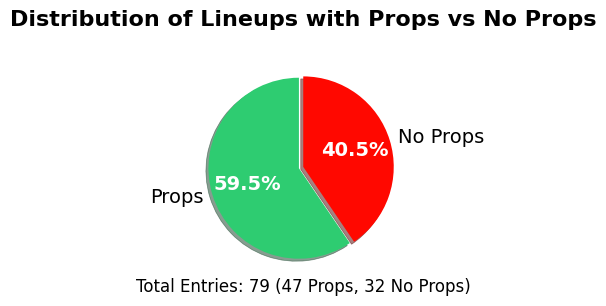

,pos,salary,team,opp,gametime,fpts,e_fpts,props,fpts/$,e_fpts/$,open,e_open,movement,e_movement,own,e_ratio,rank
name,,,,,,,,,,,,,,,,,
Jaden Hardy,SG,3800.0,DAL,UTA,"(8, 30)",27.85,13.925,---,7.329,3.664,16.97,8.48,10.88,5.44,5.93,0.500,1
Walter Clayton,PG/SG,3500.0,UTA,DAL,"(8, 30)",25.43,12.715,---,7.266,3.633,27.12,13.56,-1.69,-0.85,63.93,0.500,2
Kyle Anderson,PF/C,4000.0,UTA,DAL,"(8, 30)",27.54,13.770,---,6.885,3.442,27.24,13.62,0.30,0.15,69.07,0.500,3
Dwight Powell,C,3500.0,DAL,UTA,"(8, 30)",23.80,11.900,---,6.800,3.400,23.80,11.90,0.00,0.00,55.13,0.500,4
Brandon Williams,PG/SG,4800.0,DAL,UTA,"(8, 30)",31.40,15.700,---,6.542,3.271,30.14,15.07,1.26,0.63,67.87,0.500,5
Naji Marshall,SG/SF,6300.0,DAL,UTA,"(8, 30)",36.62,18.040,PRASB3(T),5.813,2.863,34.62,16.39,2.00,1.65,42.93,0.493,6
Tyler Herro,PG/SG,6800.0,MIA,BOS,"(7, 30)",35.98,17.990,---,5.291,2.646,36.19,18.10,-0.21,-0.11,29.50,0.500,7
PJ Washington,SF/PF,6200.0,DAL,UTA,"(8, 30)",34.62,16.380,PRASB3(T),5.584,2.642,33.68,16.84,0.94,-0.46,55.73,0.473,8
Keyonte George,PG,8200.0,UTA,DAL,"(8, 30)",44.38,21.510,PRASB3(T),5.412,2.623,42.38,20.16,2.00,1.35,14.40,0.485,9


In [3]:
if not df.loc[df.props == '---'].empty:
    try:
        fig = prop_ratio(df, cutoff=0.0)
        display(fig)  # Only display once
        plt.close(fig)
    except ValueError:
        print('No props available. Using backup projections for all players.\n')
else:
    output_msgs('All players with props', char='=')

display(df)

In [4]:
team_dfs = {
    team:
    df.loc[df['team'] == team]
    for team in df['team'].drop_duplicates()
}

In [5]:
import numpy as np
# team_dfs[str(np.random.choice(list(team_dfs.keys())))]

#### `handler.constant_scrape()`
##### Repeatedly scrapes props, making sure always as up to date as possible and saving behind the scenes.
##### Caveats include the fact it has an infinite loop built in and that it is pretty useless when it comes to playoffs since books much more on top of lines then.

In [6]:
# df = PropHandler(
#     SITE,
#     MODE,
#     edits=EDITS,
#     drop=DROP,
#     constant=True,
#     # override_edits=OVERRIDE_EDITS
# ).constant_scrape(verbose=0) 

In [7]:
team_dfs['MIA']

,pos,salary,team,opp,gametime,fpts,e_fpts,props,fpts/$,e_fpts/$,open,e_open,movement,e_movement,own,e_ratio,rank
name,,,,,,,,,,,,,,,,,
Tyler Herro,PG/SG,6800.0,MIA,BOS,"(7, 30)",35.98,17.990,---,5.291,2.646,36.19,18.10,-0.21,-0.11,29.50,0.5,7
Bam Adebayo,C,7000.0,MIA,BOS,"(7, 30)",36.15,18.075,---,5.164,2.582,36.63,18.32,-0.48,-0.25,16.03,0.5,11
Pelle Larsson,SG/SF,4000.0,MIA,BOS,"(7, 30)",20.22,10.110,---,5.055,2.527,20.26,10.13,-0.04,-0.02,8.30,0.5,14
Andrew Wiggins,PF,5500.0,MIA,BOS,"(7, 30)",27.07,13.535,---,4.922,2.461,27.28,13.64,-0.21,-0.11,12.00,0.5,17
Norman Powell,SG/SF,6400.0,MIA,BOS,"(7, 30)",31.36,15.680,---,4.900,2.450,32.54,16.27,-1.18,-0.59,15.87,0.5,19
Kel'el Ware,C,5400.0,MIA,BOS,"(7, 30)",20.38,10.190,---,3.774,1.887,20.53,10.26,-0.15,-0.07,0.20,0.5,68
Nikola Jovic,PF/C,4500.0,MIA,BOS,"(7, 30)",15.11,7.555,---,3.358,1.679,15.11,7.56,0.00,-0.00,0.27,0.5,75
